In this notebook we will delve further into dataset creation. The MNIST dataset used previously was extremly simple and this notebook will give you a better idea of how this is done for typical applications. 


In [1]:
from __future__ import absolute_import, division, print_function

!pip install tensorflow==2.0.0-alpha0 

import os

import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.transforms as trans

from PIL import Image, ImageEnhance, ImageFilter

%pylab inline

You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
TensorFlow version is  2.0.0-alpha0
Populating the interactive namespace from numpy and matplotlib


The next cell will download a cat and dog dataset so that the contents can be examined in more detail. The idea is to show how this process is typically completed.

The `base_dir` variable is set to the top of the directories to be examined. 

In [2]:
zip_file = tf.keras.utils.get_file(origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip", 
                                   cache_dir='.',fname="cats_and_dogs_filtered.zip", extract=True)

base_dir, _ = os.path.splitext(zip_file)
print(base_dir)

./datasets/cats_and_dogs_filtered


Show the directory structure


In [3]:
# code to show directory structure
print(os.listdir('./datasets'))

print(os.listdir('./datasets/cats_and_dogs_filtered'))

print(os.listdir('./datasets/cats_and_dogs_filtered/train'))

dog_list = os.listdir('./datasets/cats_and_dogs_filtered/train/dogs')
print (dog_list[0:5])
print (len(dog_list))

cat_list = os.listdir('./datasets/cats_and_dogs_filtered/train/cats')
print (cat_list[0:5])
print (len(cat_list))

['cat.952.jpg', '.DS_Store', 'cats_and_dogs_filtered', 'cats_and_dogs_filtered.zip', 'cat.952a.jpg', 'cat.952c.jpg', 'cat.952b.jpg', 'cat.952d.jpg']
['vectorize.py', 'train', 'validation']
['dogs', 'cats']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg']
1000
['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg']
1000


Explore table of cat pics

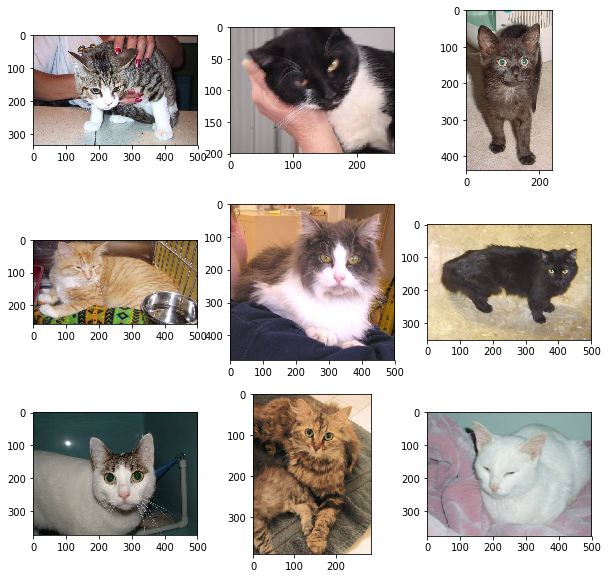

In [4]:
# code to show table of pics from cats

# update offset by values of 9 to see the next set of pictures
offset = 9

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    img_file = plt.imread('./datasets/cats_and_dogs_filtered/train/cats/' + cat_list[i+ offset])
    #img_file = plt.resize()
    plt.imshow(img_file)

plt.show()

Explore table of dog pics

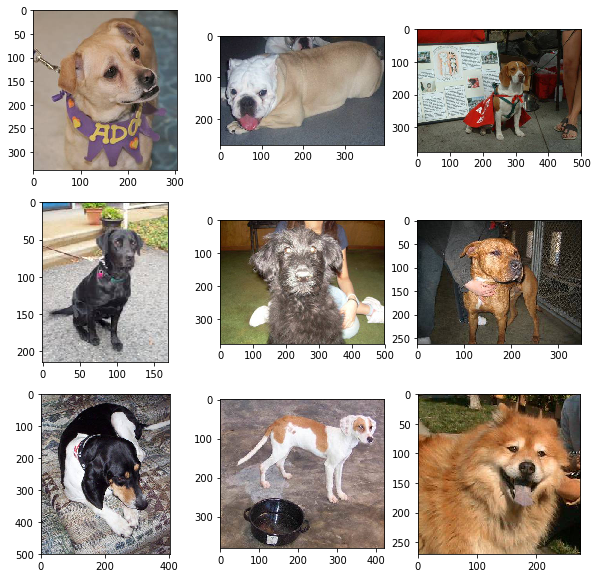

In [5]:
# code to show table of pics from dogs

# update offset by values of 9 to see the next set of pictures
offset = 9

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    img_file = plt.imread('./datasets/cats_and_dogs_filtered/train/dogs/' + dog_list[i+offset])
    #img_file = plt.resize()
    plt.imshow(img_file)
plt.show()

Show different types of augmentation, rotation

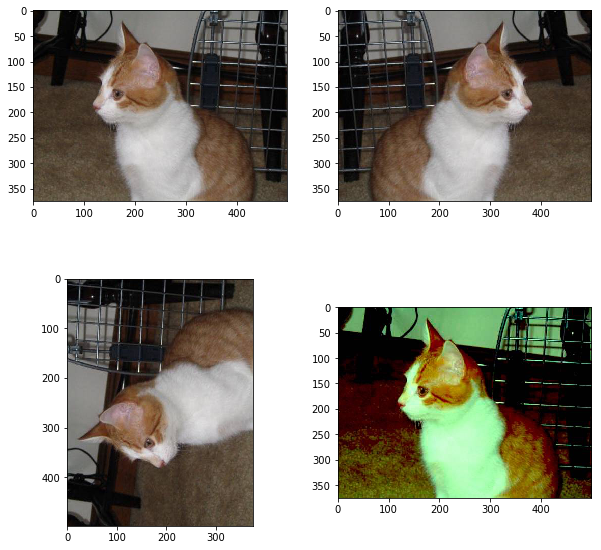

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(221)
img_file = plt.imread('./datasets/cat.952.jpg')
plt.imshow(img_file)

plt.subplot(222)
img2 = plt.imread('./datasets/cat.952a.jpg')
plt.imshow(img2)

plt.subplot(223)
img3 = plt.imread('./datasets/cat.952b.jpg')
plt.imshow(img3)

plt.subplot(224)
img3 = plt.imread('./datasets/cat.952c.jpg')
plt.imshow(img3)

plt.show()



The next cell shows how the training and validation directories are setup for the training process. These paths are used to create the datasets that will be used during training and validation. 

In [7]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print ('Total training cat images:', len(os.listdir(train_cats_dir)))

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print ('Total training dog images:', len(os.listdir(train_dogs_dir)))

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print ('Total validation cat images:', len(os.listdir(validation_cats_dir)))

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print ('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


Show function call for the Image Data Generator class and some common arguments

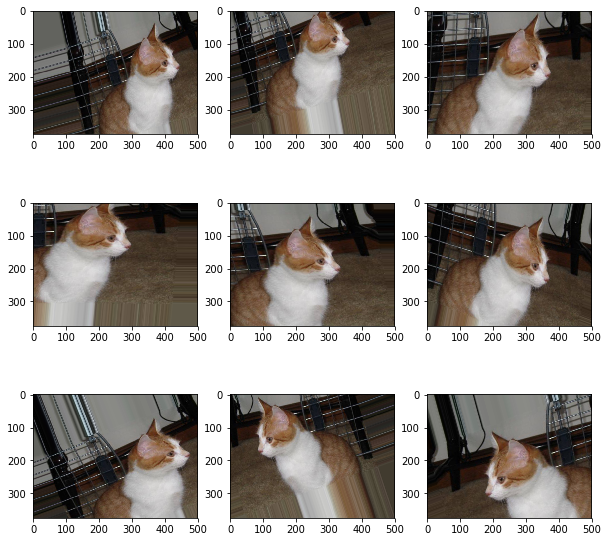

In [8]:
gen =keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=10,
    zoom_range=0.2,
    channel_shift_range=0.2,
    horizontal_flip=True,
    rescale=1./255)

gimg = plt.imread('./datasets/cat.952.jpg')
ximg = np.expand_dims(gimg,0)

img_iter = gen.flow(ximg)

#aug_imgs=[next(img_iter)[0].astype(np.uint8) for i in range(9)]
aug_imgs=[next(img_iter)[0] for i in range(9)]

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    img_file = aug_imgs[i]
    #img_file = plt.resize()
    plt.imshow(img_file)
plt.show()

Using the directories provided above two ImageDataGenerators can be created, one for training, the other for validation. These generators will apply augmentations to the images as they are pulled from the training and validation directories. 

In [9]:
image_size = 160 # All images will be resized to 160x160
batch_size = 32

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),  
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
